### Упражнение 1

* Скачайте с портала Открытых Данных производственный календарь России: https://data.gov.ru/opendata/7708660670-proizvcalendar
* На его основе определите соответствующий календарь в Pandas: `RussianBusinessCalendar(AbstractHolidayCalendar)`
* С помощью полученного в пункте выше календаря и модуля `pd.offsets` создайте DataFrame one-hot календарных признаков:
    * День недели
    * Месяц
    * Выходной день
    * Праздничный день
    * Предпраздничный рабочий день
    * Последний день месяца
    * Последний рабочий день месяца
    * Предновогодний выходной день

In [1]:
!pip install pymorphy2

In [2]:
import datetime # для работы со временем 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import locale
import calendar
import pymorphy2
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from pandas.tseries.offsets import DateOffset, Day

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def set_rus_locale():
    locale.setlocale(
        locale.LC_ALL,
        'rus_rus' if sys.platform == 'win32' else 'ru_RU.UTF-8')

set_rus_locale()
pd.set_option('display.max_columns', None)
morph = pymorphy2.MorphAnalyzer()

work_calendar = pd.read_csv('./data/calendar.csv')
work_calendar

,Год/Месяц,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
0,1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,114,2004,1807.2,1204.8
1,2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31",250,116,1995,1800.0,1200.0
2,2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30",251,114,2001,1807.2,1204.8
3,2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*",250,115,1992,1792.0,1192.0
4,2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*",250,115,1992,1792.0,1192.0
5,2004,"1,2,3,4,6*,7,10,11,17,18,24,25,31","1,7,8,14,15,21,22,23,28,29","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,115,2004,1803.2,1200.8
6,2005,"1,2,3,4,5,6,7,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,22*,23,26,27","5*,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,2,7,8,9,14,15,21,22,28,29","4,5,11,12,13,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29,30","3*,4,5,6,12,13,19,20,26,27","3,4,10,11,17,18,24,25,31",248,117,1981,1782.6,1187.4
7,2006,"1,2,3,4,5,6,7,8,9,14,15,21,22,28,29","4,5,11,12,18,19,22*,23,24,25","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,6*,7,8,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","3*,4,5,6,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31",248,117,1981,1782.6,1187.4
8,2007,"1,2,3,4,5,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,22*,23,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28*,29,30","1,5,6,8*,9,12,13,19,20,26,27","2,3,9*,10,11,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,5,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29*,30,31",249,116,1986,1786.8,1189.2
9,2008,"1,2,3,4,5,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,8*,9,10,11,17,18,24,25,31","1,8,11*,12,13,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23

In [3]:
events = pd.DataFrame(index=pd.date_range(start='2013-03-25', end='2020-01-10', freq='D'))

class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(2013, 3, 25)
    end_date = datetime.datetime(2020, 1, 10)
    rules = []
    for i, row in work_calendar.iterrows():
        year = int(row[0])
        for month in range(1, 13):
            for day in row[month].replace('*', '').replace('+', '').split(','):
                rules.append(Holiday('Holiday ' + str(i), year=year, month=month, day=int(day)))
    
    
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri', 
                                              calendar=RussianBusinessCalendar())

cal = RussianBusinessCalendar()

#В соответствии с производственным календарем Консультант Плюс заполним государственные праздники http://www.consultant.ru/law/ref/calendar/proizvodstvennye/2021/
feasts = []
for i in range(1, 9):
    feasts.append((1, i))

feasts.append((2, 23))
feasts.append((3, 8))
feasts.append((5, 1))
feasts.append((5, 9))
feasts.append((6, 12))
feasts.append((11, 4))

holidays = cal.holidays()

events['выходной'] = 0
events['праздник'] = 0
events['предпраздничный рабочий день'] = 0
events['последний день месяца'] = 0
events['последний рабочий день месяца'] = 0

for i in range(0, 7):
    events[calendar.day_abbr[i]] = 0
for i in range(1, 13):
    events[morph.parse(calendar.month_name[i])[0].normal_form] = 0    
    
events['Предновогодний выходной день'] = 0
for i, row in events.iterrows():
    year = i.year
    month = i.month
    day = i.day
    weekday = i.weekday()
    day_name = pd.to_datetime(i).strftime("%a")
    month_name = morph.parse(pd.to_datetime(i).strftime("%B"))[0].normal_form
    events.at[i, day_name] = 1
    events.at[i, month_name] = 1
    
    current_day = datetime.datetime(year, month, day)
    if current_day in holidays:
        events.at[i, 'выходной'] = 1
    
    if month == 12:
        last_holiday = cal.holidays().to_series()[str(year) + '-' + str(month)].index[-1].day
        if last_holiday == day:
            events.at[i, 'Предновогодний выходной день'] = 1
        
    if (month, day) in feasts:
        events.at[i, 'праздник'] = 1
        before_feast = i - russian_busday
        events.at[before_feast, 'предпраздничный рабочий день'] = 1
    
    if i.is_month_end:
        events.at[i, 'последний день месяца'] = 1
        if current_day in holidays:
            events.at[i - russian_busday, 'последний рабочий день месяца'] = 1
        else:
            events.at[i, 'последний рабочий день месяца'] = 1
        
events



,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,сб,вс,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
2013-03-25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-27,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-29,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-07,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-08,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-09,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Упражнение 2

* Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:
    * Лаговые переменные рабочих дней с глубинами: 1, 3, 5
    * Скользящие статистики `['mean', 'median', 'max', 'min', 'std'] ` с окнами 1, 3, 5 сгрупированные по дням недели
    * Статистики `['mean', 'median', 'max', 'min', 'std'] ` в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

<AxesSubplot:xlabel='TRADEDATE'>

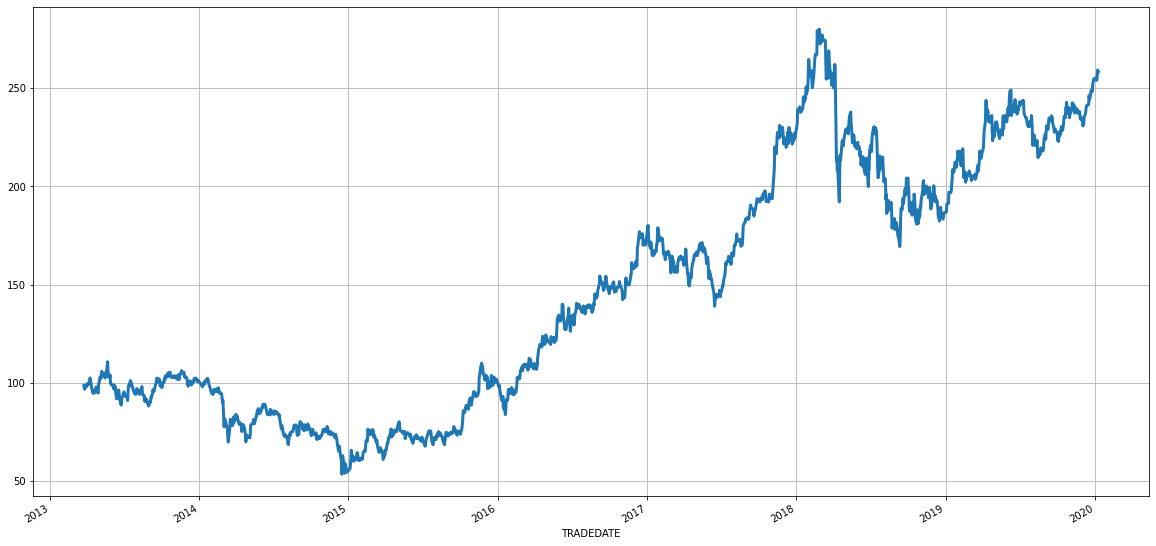

In [4]:
ts = pd.read_csv('./data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts = ts.CLOSE

ts.plot(figsize=(20, 10), grid=True, linewidth=3)

In [5]:
ts

TRADEDATE
2013-03-25     98.79
2013-03-26     97.20
2013-03-27     96.75
2013-03-28     98.59
2013-03-29     98.76
               ...  
2020-01-03    255.00
2020-01-06    253.90
2020-01-08    259.15
2020-01-09    257.99
2020-01-10    258.19
Name: CLOSE, Length: 1712, dtype: float64

##### Задание 1

<AxesSubplot:xlabel='TRADEDATE'>

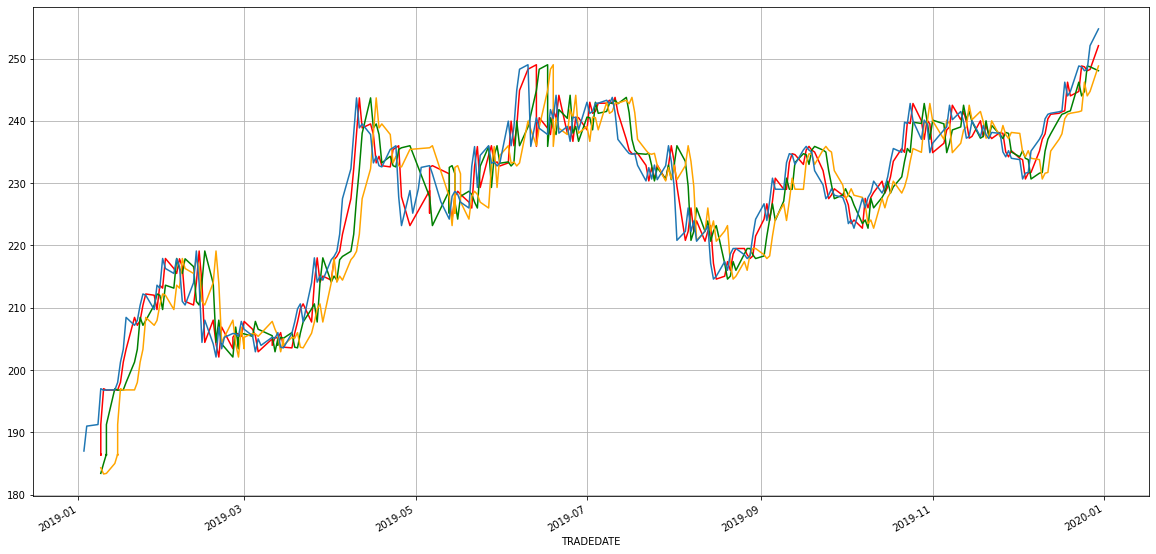

In [6]:
ts_by_day = ts.asfreq('1D').fillna(method='ffill')
ts_shift_1 = ts_by_day.shift(1, freq=russian_busday)
ts_shift_3 = ts_by_day.shift(3, freq=russian_busday)
ts_shift_5 = ts_by_day.shift(5, freq=russian_busday)
ts_shift_1['2019'].plot(figsize=(20, 10), color='red')
ts_shift_3['2019'].plot(figsize=(20, 10), color='green')
ts_shift_5['2019'].plot(figsize=(20, 10), color='orange')
ts['2019'].plot(grid=True)

##### Задание 2

In [7]:
ts = pd.DataFrame(ts)
ts_by_day = ts.asfreq('1D').fillna(method='ffill')
ts_by_day['weekday'] = ts_by_day.index.weekday
groupped = ts_by_day.groupby('weekday')['CLOSE']

<AxesSubplot:xlabel='TRADEDATE'>

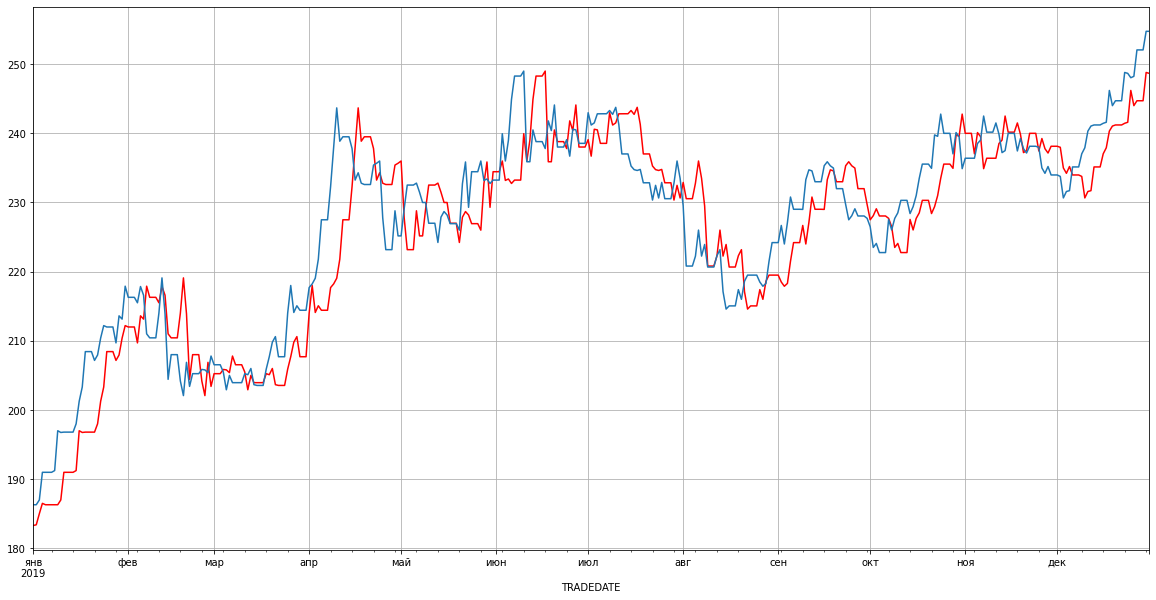

In [8]:
rolling_mean_window_1 = groupped.transform(lambda x: x.rolling(window=1).mean().shift(1))
rolling_mean_window_1['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

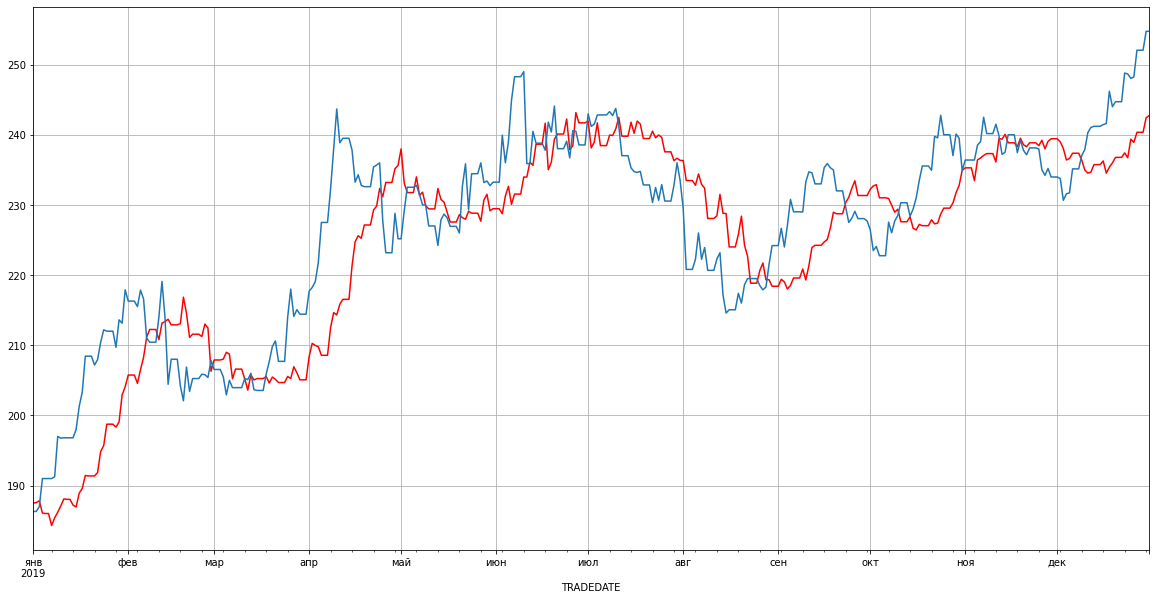

In [9]:
rolling_mean_window_3 = groupped.transform(lambda x: x.rolling(window=3).mean().shift(1))
rolling_mean_window_3['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

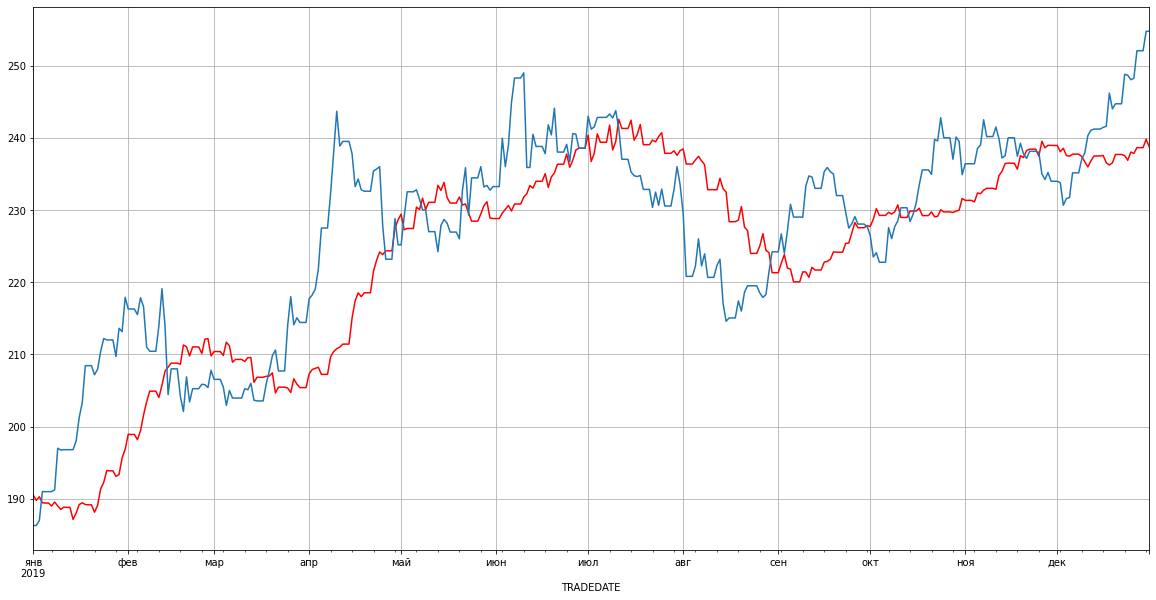

In [10]:
rolling_mean_window_5 = groupped.transform(lambda x: x.rolling(window=5).mean().shift(1))
rolling_mean_window_5['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

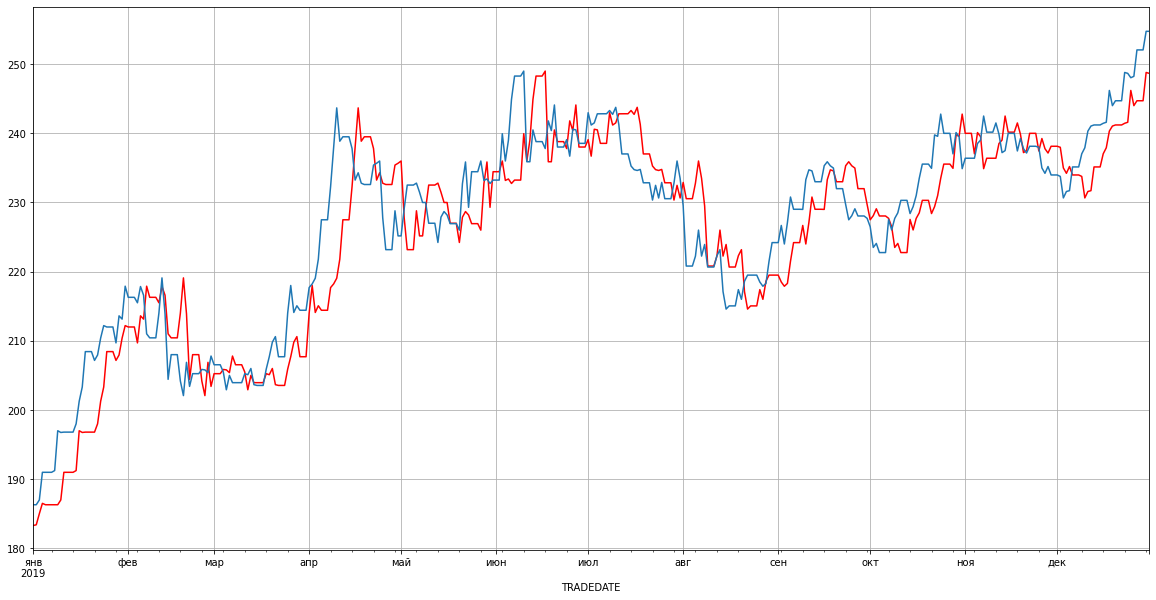

In [11]:
rolling_median_window_1 = groupped.transform(lambda x: x.rolling(window=1).median().shift(1))
rolling_median_window_1['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

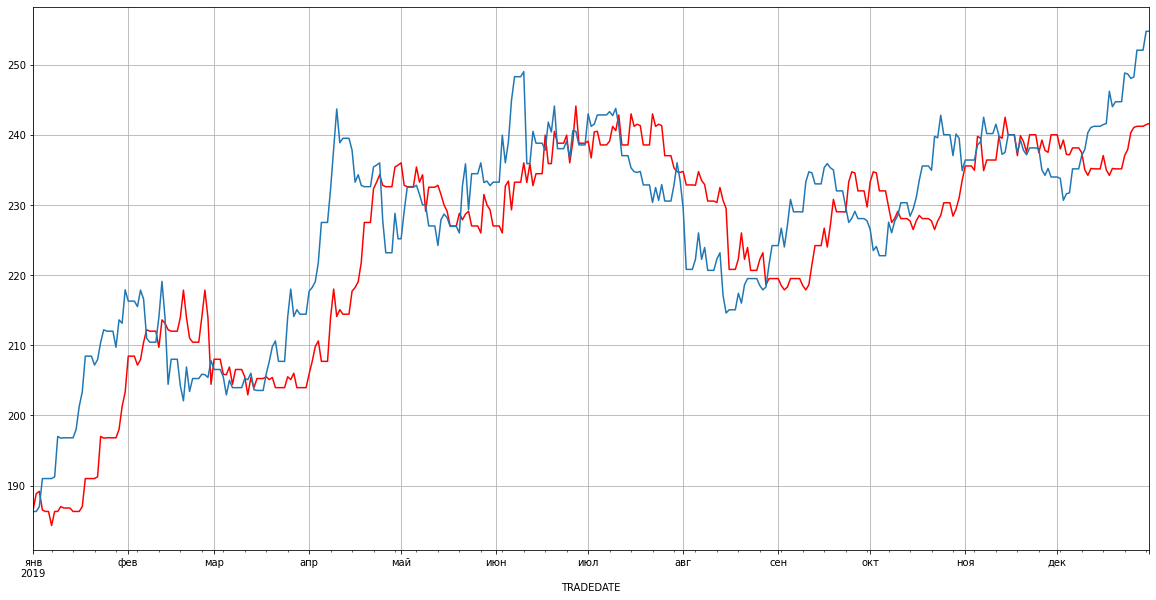

In [12]:
rolling_median_window_3 = groupped.transform(lambda x: x.rolling(window=3).median().shift(1))
rolling_median_window_3['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

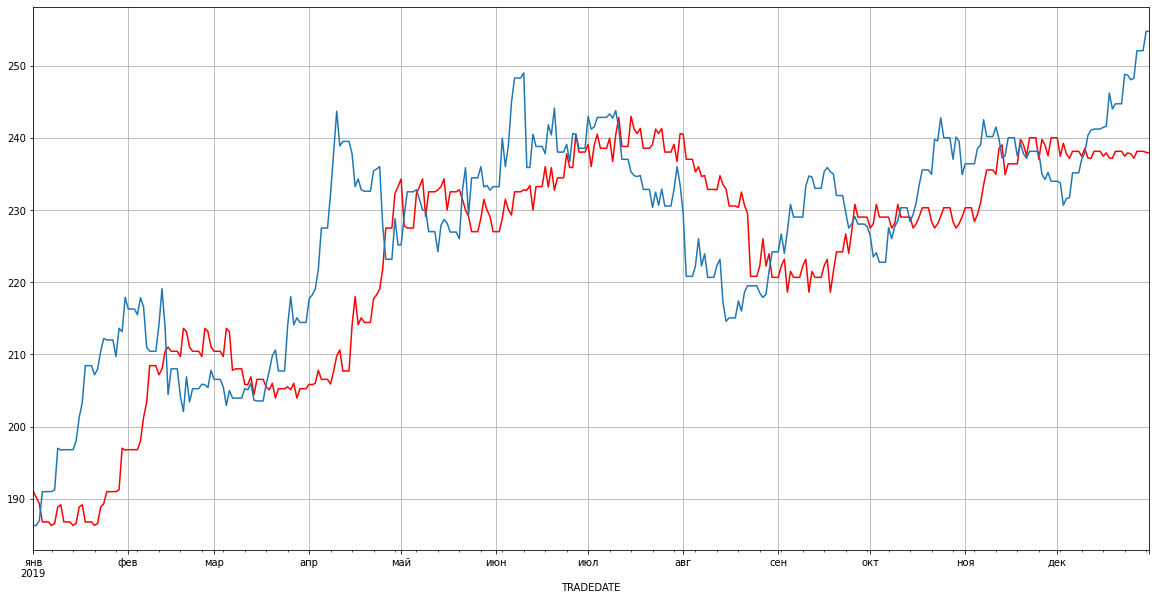

In [13]:
rolling_median_window_5 = groupped.transform(lambda x: x.rolling(window=5).median().shift(1))
rolling_median_window_5['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

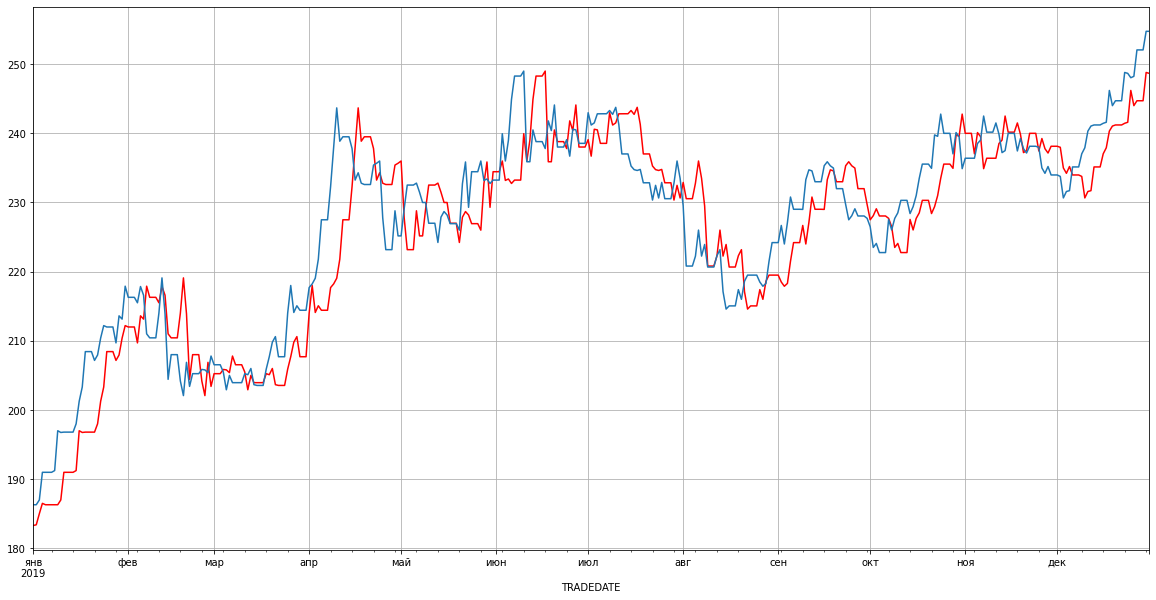

In [14]:
rolling_max_window_1 = groupped.transform(lambda x: x.rolling(window=1).max().shift(1))
rolling_max_window_1['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

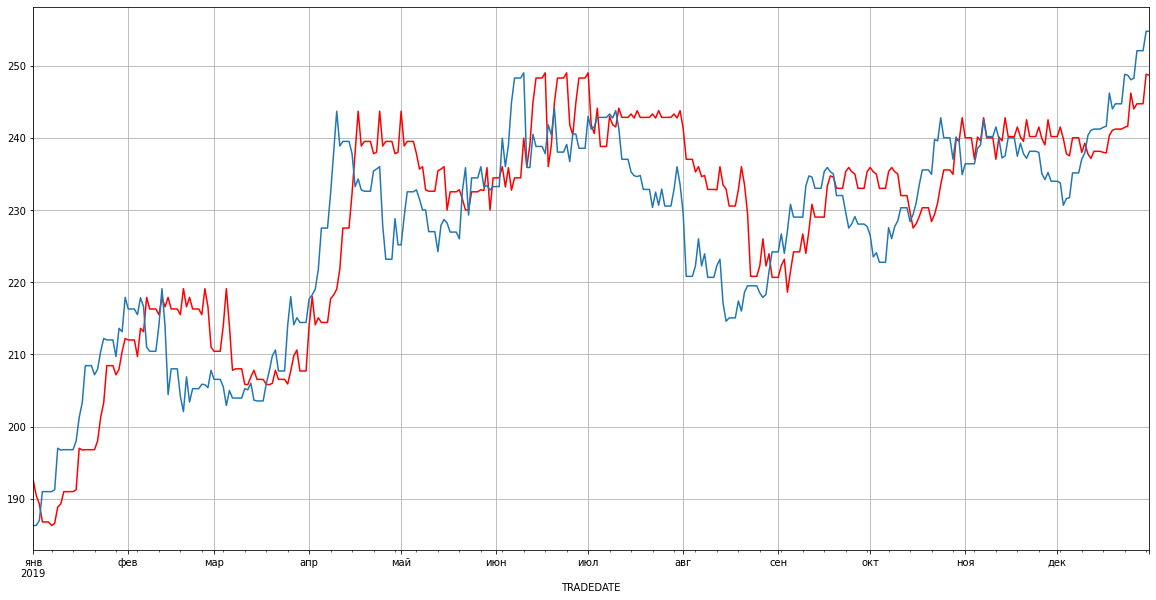

In [15]:
rolling_max_window_3 = groupped.transform(lambda x: x.rolling(window=3).max().shift(1))
rolling_max_window_3['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

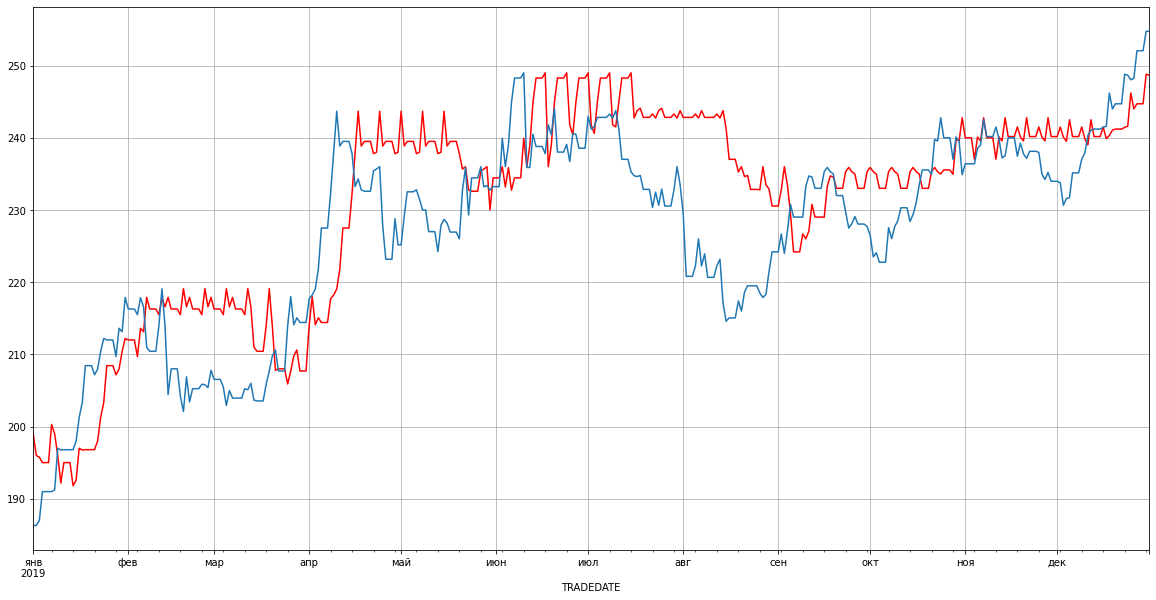

In [16]:
rolling_max_window_5 = groupped.transform(lambda x: x.rolling(window=5).max().shift(1))
rolling_max_window_5['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

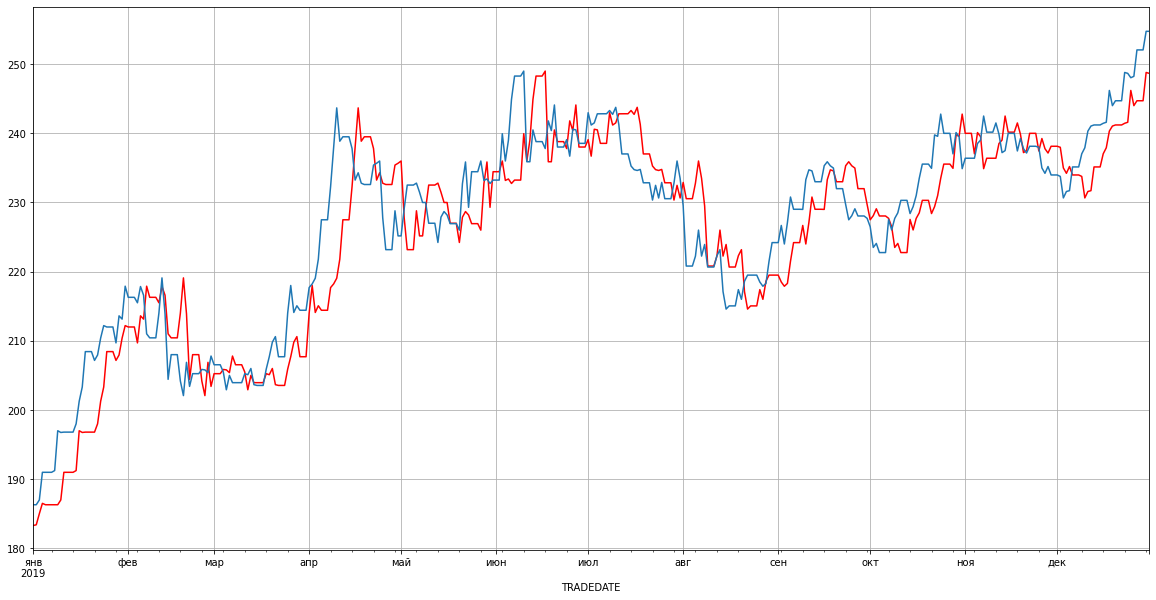

In [17]:
rolling_min_window_1 = groupped.transform(lambda x: x.rolling(window=1).min().shift(1))
rolling_min_window_1['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

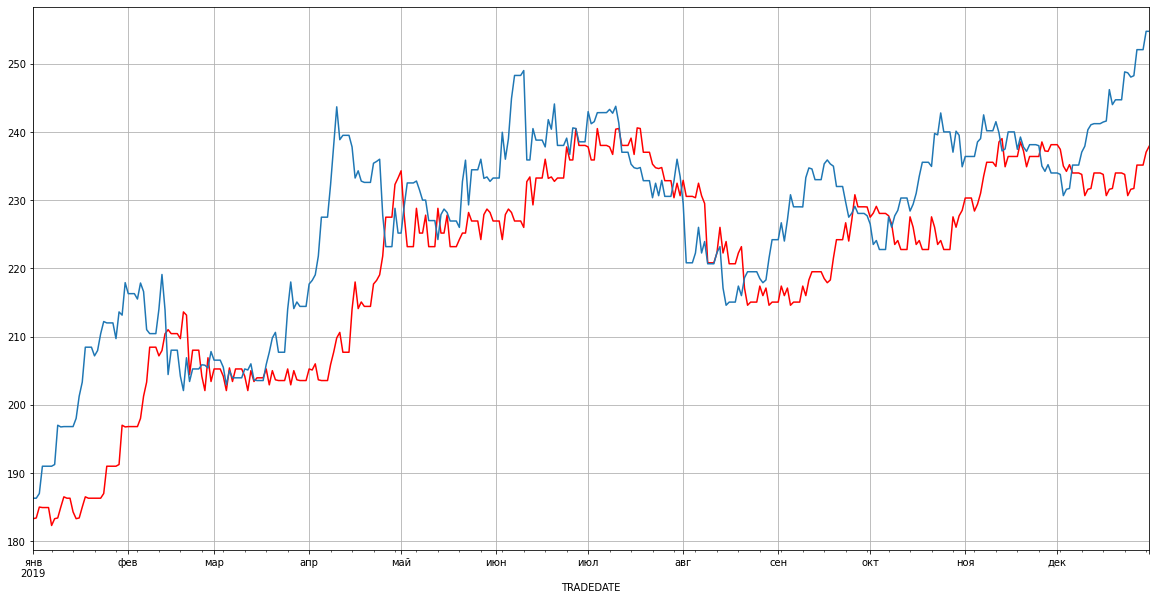

In [18]:
rolling_min_window_3 = groupped.transform(lambda x: x.rolling(window=3).min().shift(1))
rolling_min_window_3['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

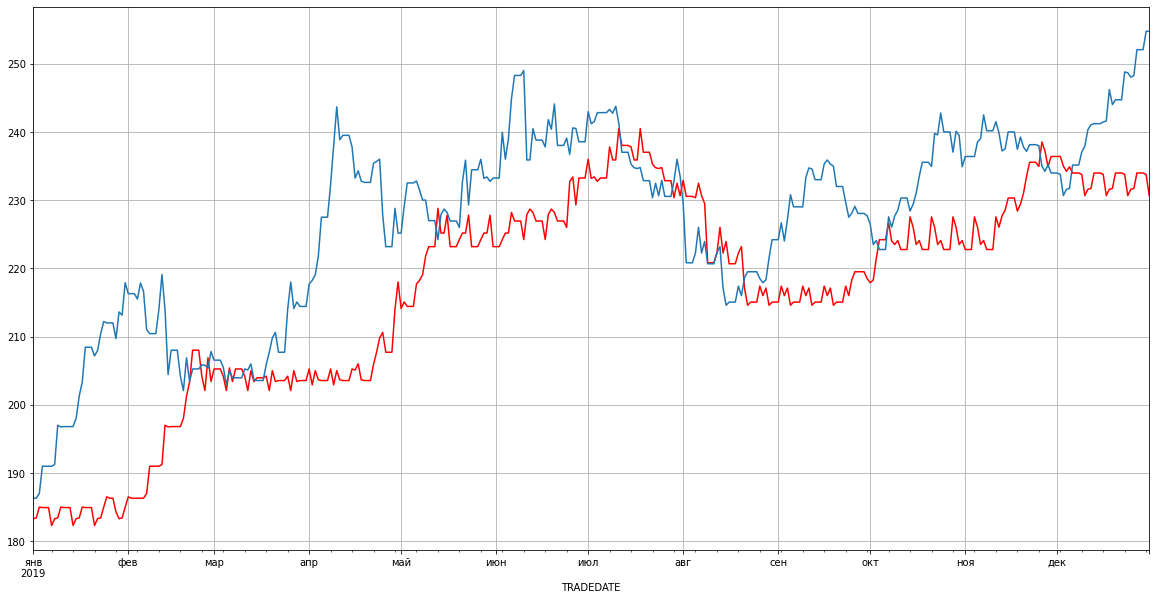

In [19]:
rolling_min_window_5 = groupped.transform(lambda x: x.rolling(window=5).min().shift(1))
rolling_min_window_5['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

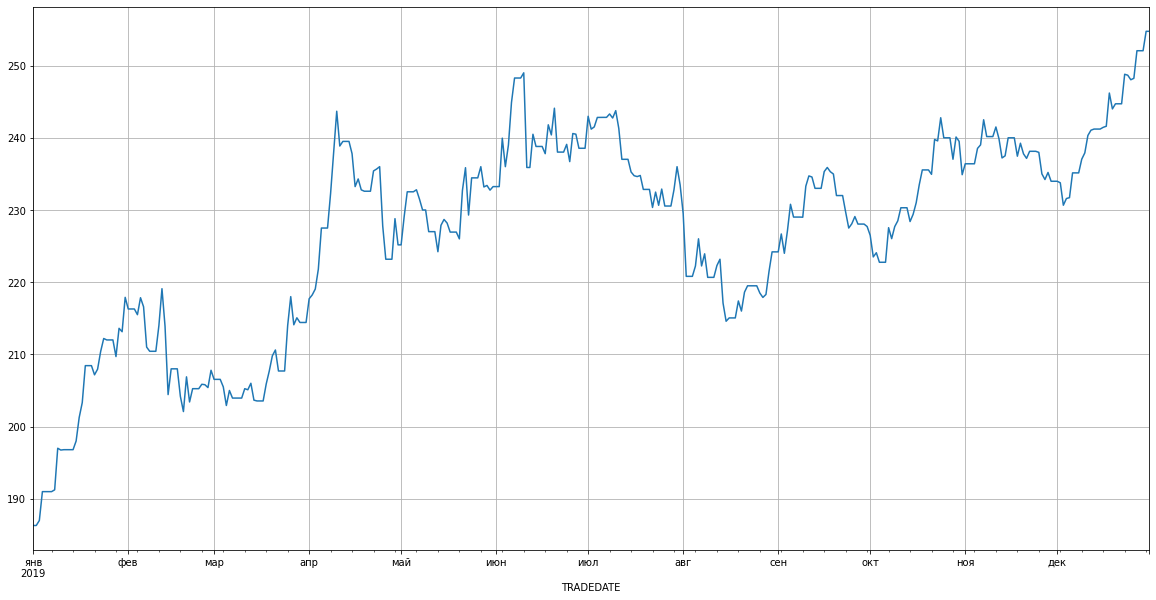

In [20]:
rolling_std_window_1 = groupped.transform(lambda x: x.rolling(window=1).std().shift(1))
rolling_std_window_1['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

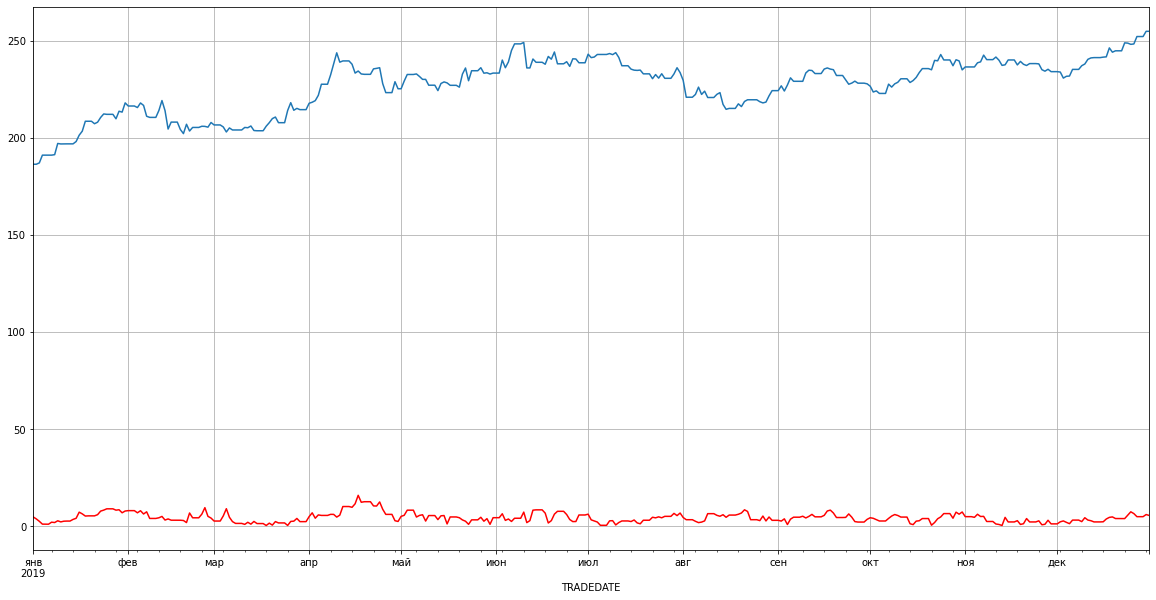

In [21]:
rolling_std_window_3 = groupped.transform(lambda x: x.rolling(window=3).std().shift(1))
rolling_std_window_3['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

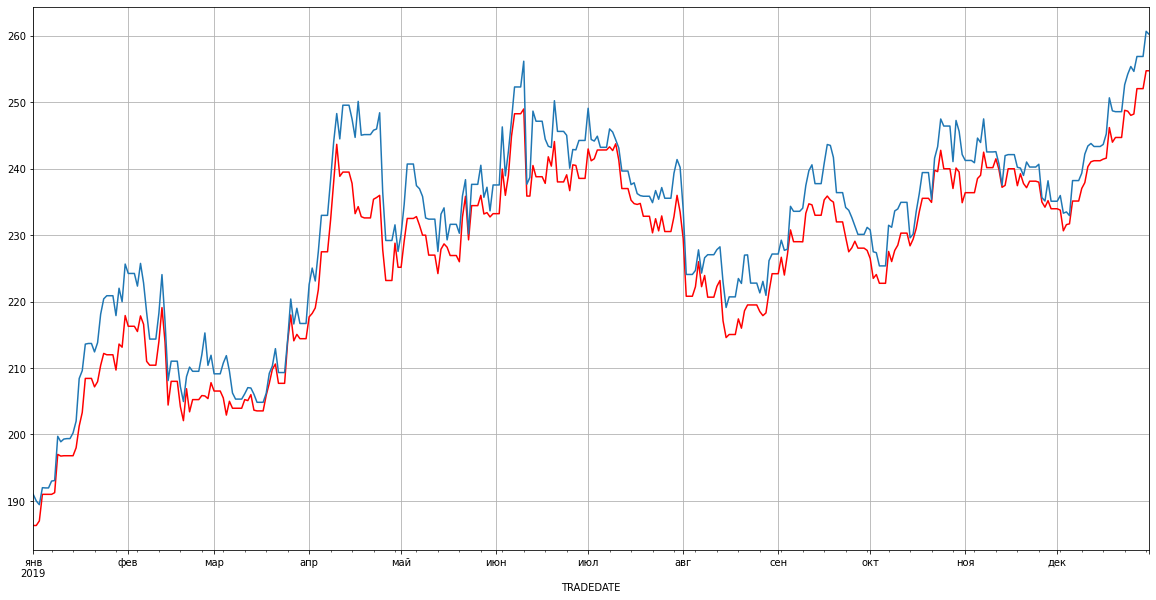

In [22]:
rolling_std_window_3 = groupped.transform(lambda x: x.rolling(window=3).std().shift(1))
result = ts_by_day['2019']['CLOSE'] + rolling_std_window_3['2019']
ts_by_day['2019']['CLOSE'].plot(figsize=(20, 10), color='red')
result.plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

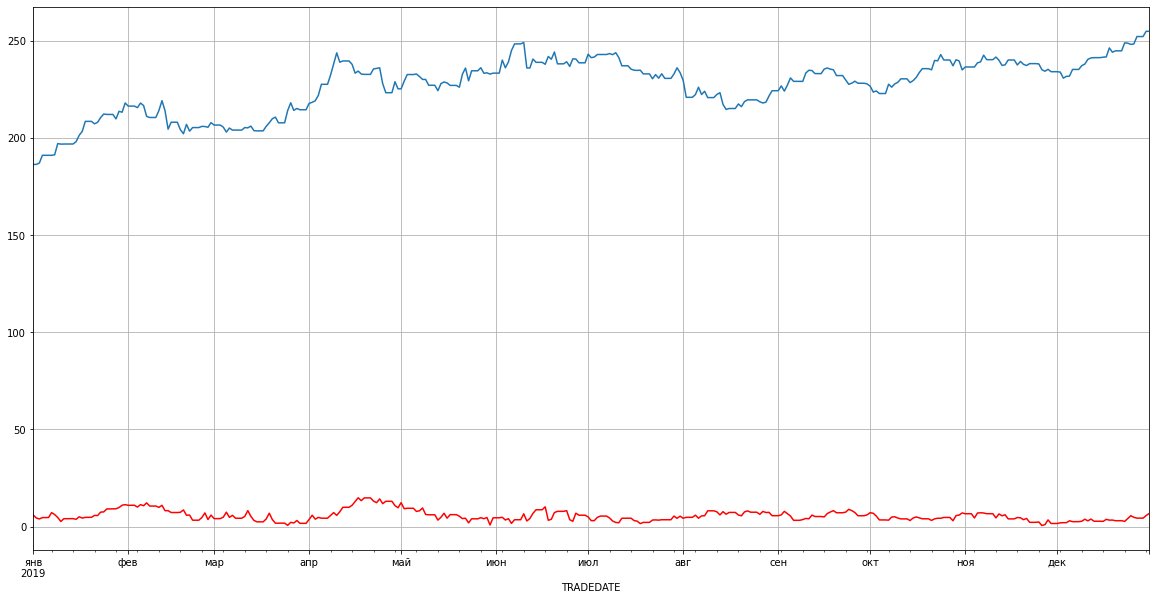

In [23]:
rolling_std_window_5 = groupped.transform(lambda x: x.rolling(window=5).std().shift(1))
rolling_std_window_5['2019'].plot(figsize=(20, 10), color='red')
ts_by_day['2019']['CLOSE'].plot(grid=True)

<AxesSubplot:xlabel='TRADEDATE'>

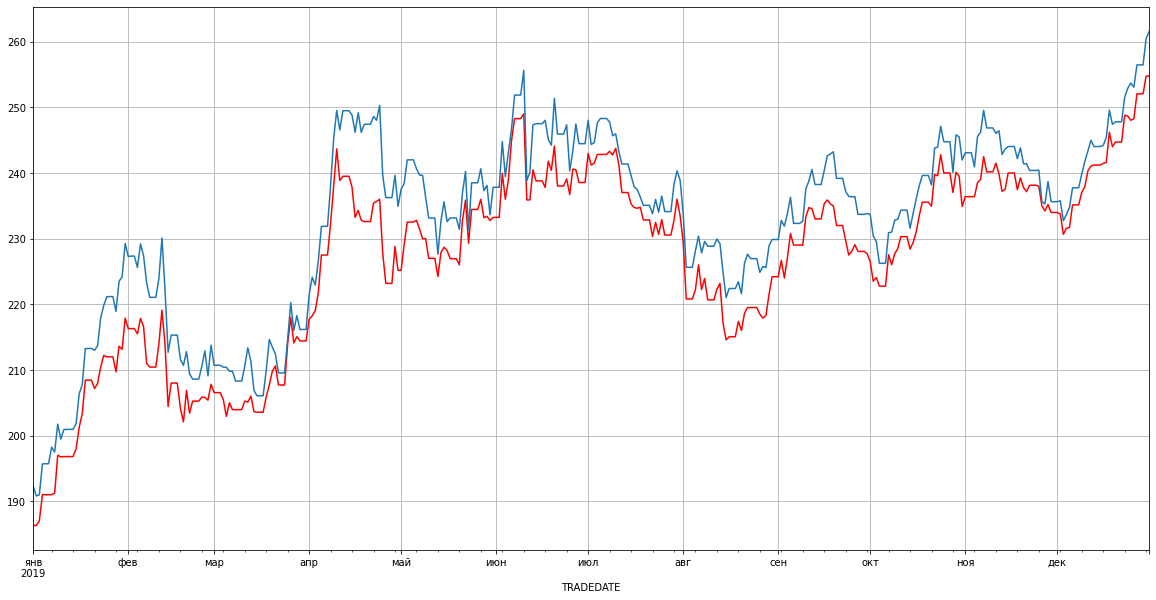

In [24]:
rolling_std_window_5 = groupped.transform(lambda x: x.rolling(window=5).std().shift(1))
result = ts_by_day['2019']['CLOSE'] + rolling_std_window_5['2019']
ts_by_day['2019']['CLOSE'].plot(figsize=(20, 10), color='red')
result.plot(grid=True)

##### Задание 3

In [25]:
events_with_prices = pd.concat([events, ts_by_day], axis=1, join="inner")
events_with_prices

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,сб,вс,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день,CLOSE,weekday
2013-03-25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,98.79,0
2013-03-26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,97.20,1
2013-03-27,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,96.75,2
2013-03-28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,98.59,3
2013-03-29,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,98.76,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,253.90,0
2020-01-07,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,253.90,1
2020-01-08,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,259.15,2
2020-01-09,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,257.99,3


<AxesSubplot:>

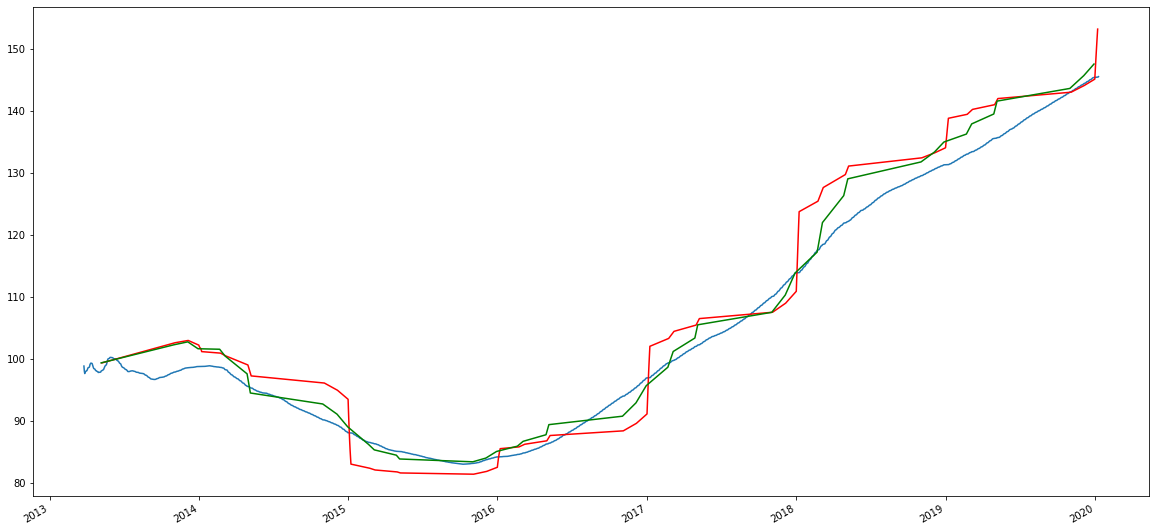

In [26]:
events_with_prices[events_with_prices['выходной'] == 0].groupby('выходной')['CLOSE'].transform(lambda x: x.expanding().mean().shift(1)).plot(figsize=(20, 10))
events_with_prices[events_with_prices['праздник'] == 1].groupby('праздник')['CLOSE'].transform(lambda x: x.expanding().mean().shift(1)).plot(figsize=(20, 10), color='red')
events_with_prices[events_with_prices['предпраздничный рабочий день'] == 1].groupby('предпраздничный рабочий день')['CLOSE'].transform(lambda x: x.expanding().mean().shift(1)).plot(figsize=(20, 10), color='green')



<AxesSubplot:>

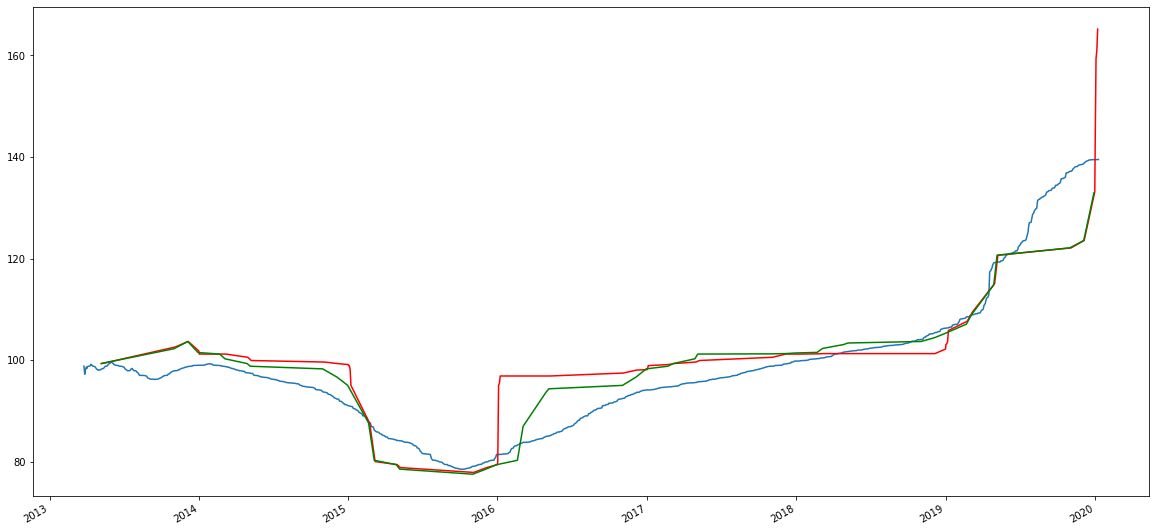

In [27]:
events_with_prices[events_with_prices['выходной'] == 0].groupby('выходной')['CLOSE'].transform(lambda x: x.expanding().median().shift(1)).plot(figsize=(20, 10))
events_with_prices[events_with_prices['праздник'] == 1].groupby('праздник')['CLOSE'].transform(lambda x: x.expanding().median().shift(1)).plot(figsize=(20, 10), color='red')
events_with_prices[events_with_prices['предпраздничный рабочий день'] == 1].groupby('предпраздничный рабочий день')['CLOSE'].transform(lambda x: x.expanding().median().shift(1)).plot(figsize=(20, 10), color='green')

<AxesSubplot:>

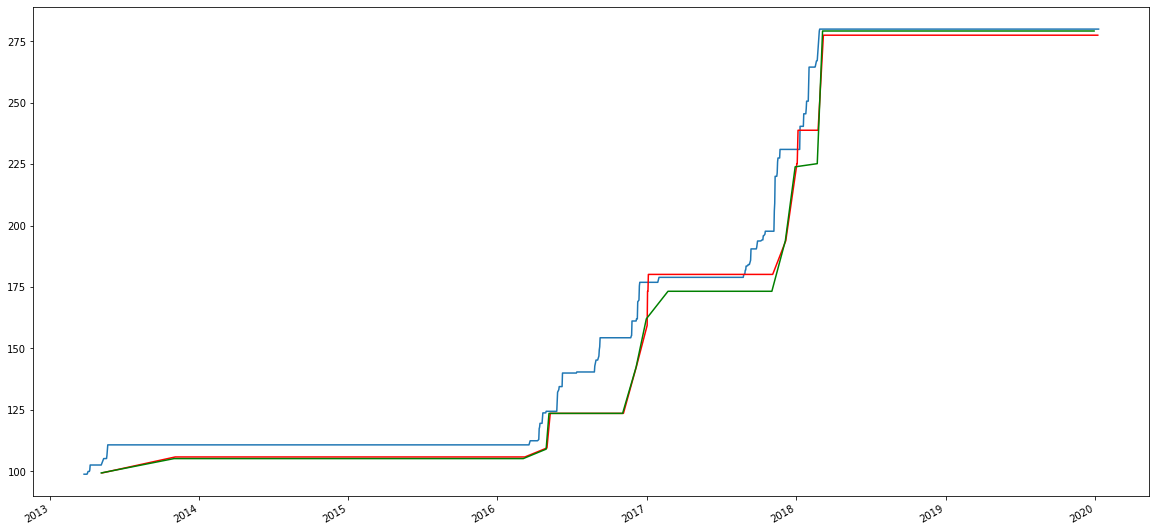

In [30]:
events_with_prices[events_with_prices['выходной'] == 0].groupby('выходной')['CLOSE'].transform(lambda x: x.expanding().max().shift(1)).plot(figsize=(20, 10))
events_with_prices[events_with_prices['праздник'] == 1].groupby('праздник')['CLOSE'].transform(lambda x: x.expanding().max().shift(1)).plot(figsize=(20, 10), color='red')
events_with_prices[events_with_prices['предпраздничный рабочий день'] == 1].groupby('предпраздничный рабочий день')['CLOSE'].transform(lambda x: x.expanding().max().shift(1)).plot(figsize=(20, 10), color='green')

<AxesSubplot:>

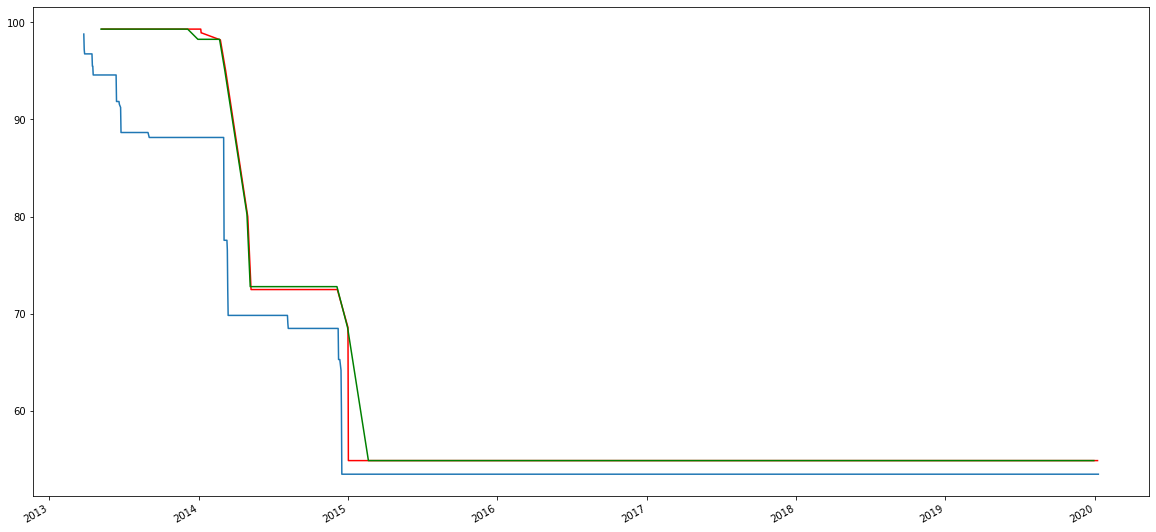

In [29]:
events_with_prices[events_with_prices['выходной'] == 0].groupby('выходной')['CLOSE'].transform(lambda x: x.expanding().min().shift(1)).plot(figsize=(20, 10))
events_with_prices[events_with_prices['праздник'] == 1].groupby('праздник')['CLOSE'].transform(lambda x: x.expanding().min().shift(1)).plot(figsize=(20, 10), color='red')
events_with_prices[events_with_prices['предпраздничный рабочий день'] == 1].groupby('предпраздничный рабочий день')['CLOSE'].transform(lambda x: x.expanding().min().shift(1)).plot(figsize=(20, 10), color='green')

<AxesSubplot:>

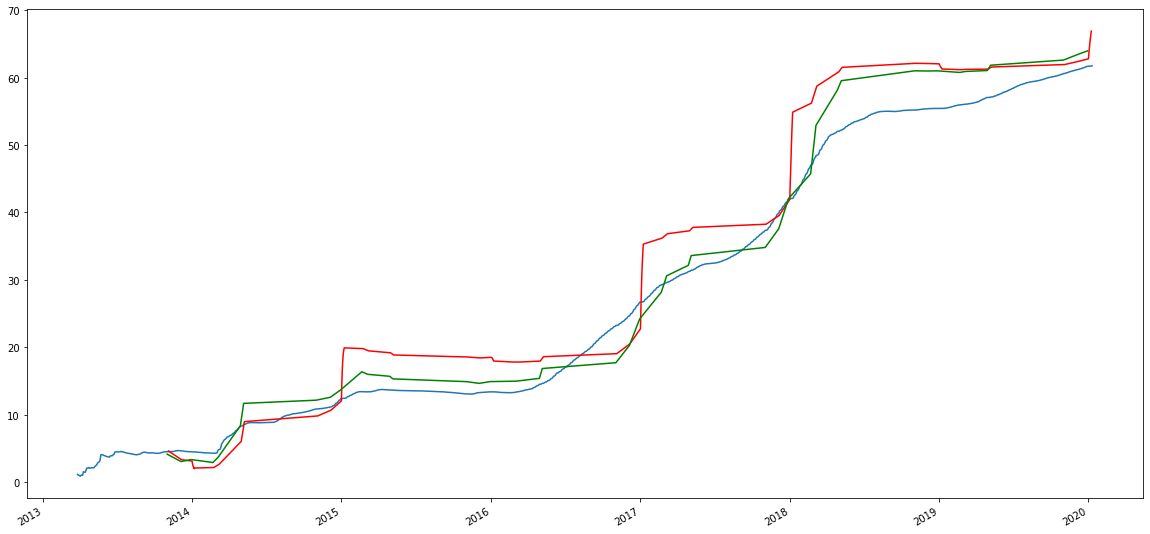

In [31]:
events_with_prices[events_with_prices['выходной'] == 0].groupby('выходной')['CLOSE'].transform(lambda x: x.expanding().std().shift(1)).plot(figsize=(20, 10))
events_with_prices[events_with_prices['праздник'] == 1].groupby('праздник')['CLOSE'].transform(lambda x: x.expanding().std().shift(1)).plot(figsize=(20, 10), color='red')
events_with_prices[events_with_prices['предпраздничный рабочий день'] == 1].groupby('предпраздничный рабочий день')['CLOSE'].transform(lambda x: x.expanding().std().shift(1)).plot(figsize=(20, 10), color='green')